In [6]:
from sklearn.linear_model import LogisticRegression
from data_prep import load_and_preprocess_data
from sklearn.pipeline import Pipeline
from ROC_gen import ROC_Generator
from conf_matrix import Matrix_Display
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from skopt.space import Real, Categorical
from skopt import BayesSearchCV
    # This line assigns the variables below to the output of the function load_and_preprocess_data
    # the file path is given at the botton of this page
X_train, X_test, y_train, y_test, X, y = load_and_preprocess_data()

    # Logistic Regression
pipeline= Pipeline ([
    ('smotetomek', SMOTETomek(random_state=42)),
    ("LgR", LogisticRegression(max_iter=10000, random_state=42))
    ])

search_space = {
    'LgR__C': Real(1e-4, 1e2, prior='log-uniform'),  # Regularization strength
    'LgR__solver': Categorical(['lbfgs', 'saga']),  # solvers that support l2 penalty and multinomial
}
opt = BayesSearchCV(pipeline, search_space, cv=10, n_iter=20, scoring='f1_macro', random_state=42)


    # ROC Curve
    # the :, 1 means you sellect all rows in the first colum of the test array
    # this essentialy re runs the model but instead of outputing binary the model outputs precentages
    # like this person is 40% to be bad credit
    # the ROC will change the point at which the model rounds up to 1 or down to 0
    #  The model will take in a series of probabilities like [0.1,0.7,....] and a [1,0,1,1.....] bin array
    # then the roc_curve function will take manually round up or down the y-prob array values deppending on the threshhold it picks
    # this could be something like 0.02 where both the 0.1 and 0.7 values would be rounded up to 1, this would
    # then will be checked againest the test sample data
    # if the clasification is correct then it is a TP and so on for the other categories
    # it will then do the TRP and FRP and graph then against eachother
    # with the AUC function it will graph the fpr and tpr arrays against one another then it essentialy integrates taht area
    # then that number essintaly shows the precent chance of the model correctly identifying TP as a TP (giving a good creditor a higher score than a bad creditor)



In [7]:
opt.fit(X_train, y_train)


,estimator,Pipeline(step...m_state=42))])
,search_spaces,"{'LgR__C': Real(low=0.00...m='normalize'), 'LgR__solver': Categorical(c...), prior=None)}"
,optimizer_kwargs,None
,n_iter,20
,scoring,'f1_macro'
,fit_params,None
,n_jobs,1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,10


In [16]:
opt.best_estimator_


,steps,"[('smotetomek', ...), ('LgR', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,smote,None
,tomek,None
,n_jobs,None
,penalty,'l2'
,dual,False


In [9]:
opt.best_score_
#best CV F1

np.float64(0.7073759115477491)

In [17]:
opt.score(X_test, y_test)


0.6933600660455242

In [14]:
y_pred = opt.predict(X_test)


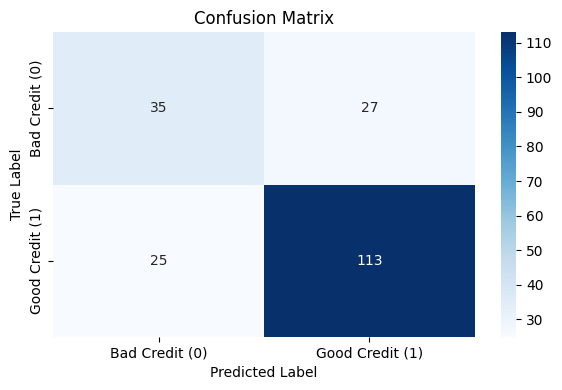

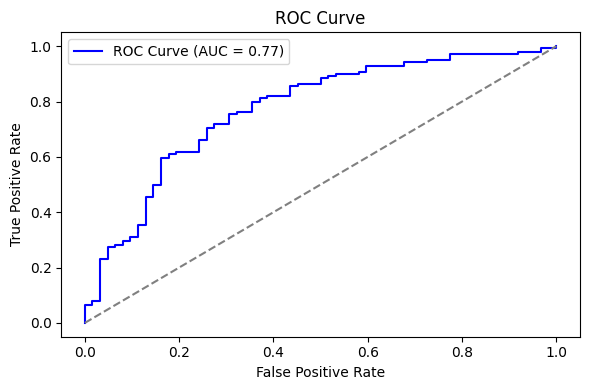

In [15]:
Matrix_Display(y_test, y_pred)
y_probs = opt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
ROC_Generator(fpr,tpr,roc_auc)
